# Evaluation

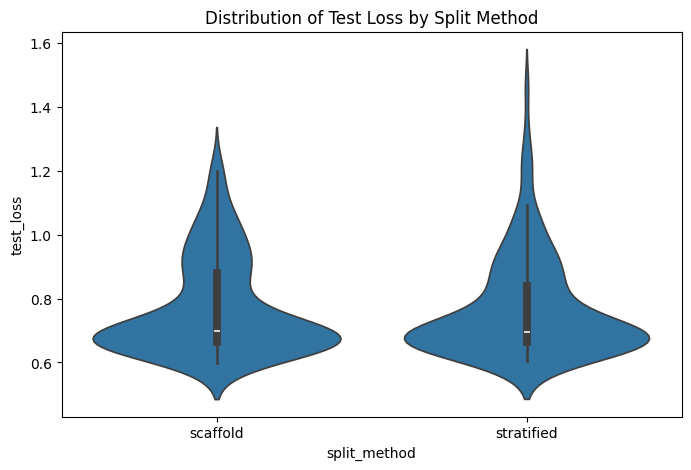

In [3]:
import glob
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# path to your folder with CSV files
folder_path = "results/"

csv_files = glob.glob(os.path.join(folder_path, "*.csv"))
df = pd.concat((pd.read_csv(f) for f in csv_files), ignore_index=True)

df = df[["split_method", "avg_final_val_loss", "test_loss"]]

plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x="split_method", y="test_loss")
plt.title("Distribution of Test Loss by Split Method")
plt.show()

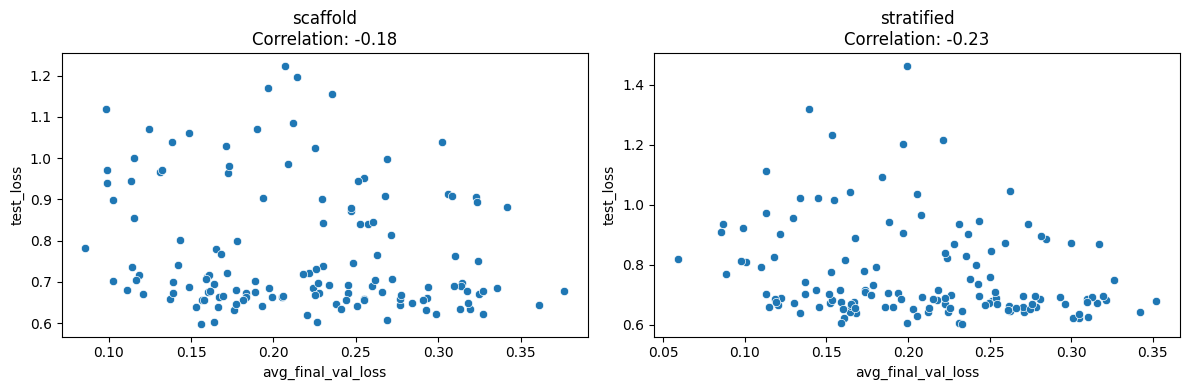

In [7]:
# Show the correlation between the test_loss and the avg_final_val_loss
import numpy as np

split_methods = df["split_method"].unique()
plt.figure(figsize=(12, 4))

for i, method in enumerate(split_methods):
    plt.subplot(1, len(split_methods), i + 1)
    sub_df = df[df["split_method"] == method]
    sns.scatterplot(data=sub_df, x="avg_final_val_loss", y="test_loss")
    corr = np.corrcoef(sub_df["avg_final_val_loss"], sub_df["test_loss"])[0, 1]
    plt.title(f"{method}\nCorrelation: {corr:.2f}")
    plt.xlabel("avg_final_val_loss")
    plt.ylabel("test_loss")

plt.tight_layout()
plt.show()